# Analyse facial data captured from ZeroMQ

In [1]:
# The usual suspects
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from datetime import datetime, timedelta
%matplotlib inline

In [2]:
#. Uncomment and run this if the above didn't work!
# !pip install numpy pandas matplotlib

In [3]:
AU_FILE = "ausample.csv"
df = pd.read_csv(AU_FILE)
df.describe()

,GLOBAL_0,GLOBAL_1,GLOBAL_2,GLOBAL_3,GLOBAL_4,GLOBAL_5,AU01,AU02,AU04,AU05,...,LOCAL_24,LOCAL_25,LOCAL_26,LOCAL_27,LOCAL_28,LOCAL_29,LOCAL_30,LOCAL_31,LOCAL_32,LOCAL_33
count,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,...,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000
mean,1.091120,-0.126484,-0.149870,-0.001927,357.839886,212.279929,1.279493,0.528579,0.603058,0.751046,...,-1.222012,0.014213,-0.328015,0.072305,-0.199805,-0.010241,0.047335,0.015128,-0.056275,0.166719
std,0.093258,0.160250,0.357109,0.129675,31.609180,30.150400,1.156702,0.890476,0.628163,0.867504,...,1.506630,1.232177,0.724359,0.375961,0.304663,0.222314,0.209880,0.143773,0.109071,0.145219
min,0.895466,-0.642089,-0.762421,-0.541812,276.161000,116.473000,0.000000,0.000000,0.000000,0.000000,...,-4.272040,-5.191840,-2.008160,-0.937115,-0.947149,-0.651858,-0.578174,-0.280153,-0.351460,-0.399888
25%,1.038893,-0.212206,-0.390685,-0.044425,345.147000,209.080000,0.258109,0.000000,0.000000,0.000000,...,-2.335900,-0.680363,-0.831856,-0.203851,-0.397322,-0.159920,-0.103067,-0.095840,-0.128797,0.086022
50%,1.078890,-0.110285,-0.221587,-0.010181,357.079000,223.872500,1.074180,0.000000,0.430659,0.413701,...,-1.292730,0.111275,-0.322570,0.069170,-0.170915,-0.000211,0.079871,0.005672,-0.063713,0.169448
75%,1.124700,-0.027360,-0.019768,0.041726,371.165500,228.559000,1.853877,0.856333,0.955297,1.271700,...,-0.199485,0.901751,0.120038,0.340544,0.014041,0.096017,0.210532,0.097167,0.014039,0.231986
max,1.415480,0.323517,0.948997,0.394120,452.183000,270.785000,5.000000,4.255430,2.423320,3.561630,...,3.029700,3.511540,1.620520,0.954477,0.671881,0.682130,0.451503,0.439652,0.259904,0.561185


This may be a more useful display:

In [4]:
for k in df.columns:
    raw_c = df[k]
    c = raw_c[raw_c != 0.0]
    print("{:10s}  min: {:6.2f}  max: {:6.2f}  mean: {:6.2f}  std: {:6.2f}".format(
        k, c.min(), c.max(), c.mean(), c.std()))

GLOBAL_0    min:   0.90  max:   1.42  mean:   1.09  std:   0.09
GLOBAL_1    min:  -0.64  max:   0.32  mean:  -0.13  std:   0.16
GLOBAL_2    min:  -0.76  max:   0.95  mean:  -0.15  std:   0.36
GLOBAL_3    min:  -0.54  max:   0.39  mean:  -0.00  std:   0.13
GLOBAL_4    min: 276.16  max: 452.18  mean: 357.84  std:  31.61
GLOBAL_5    min: 116.47  max: 270.79  mean: 212.28  std:  30.15
AU01        min:   0.01  max:   5.00  mean:   1.57  std:   1.09
AU02        min:   0.02  max:   4.26  mean:   1.29  std:   0.98
AU04        min:   0.00  max:   2.42  mean:   0.86  std:   0.58
AU05        min:   0.00  max:   3.56  mean:   1.13  std:   0.84
AU06        min:   0.01  max:   3.61  mean:   0.83  std:   0.69
AU07        min:   0.02  max:   5.00  mean:   1.58  std:   0.94
AU09        min:   0.01  max:   1.73  mean:   0.61  std:   0.39
AU10        min:   0.00  max:   3.84  mean:   0.91  std:   0.68
AU12        min:   0.00  max:   3.19  mean:   0.84  std:   0.76
AU14        min:   0.00  max:   1.90  me

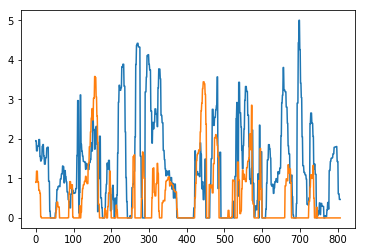

In [10]:
df['AU01'].plot()
df['AU23'].plot()